In [2]:
import scipy.stats as sts
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special as sp
from scipy.optimize import minimize

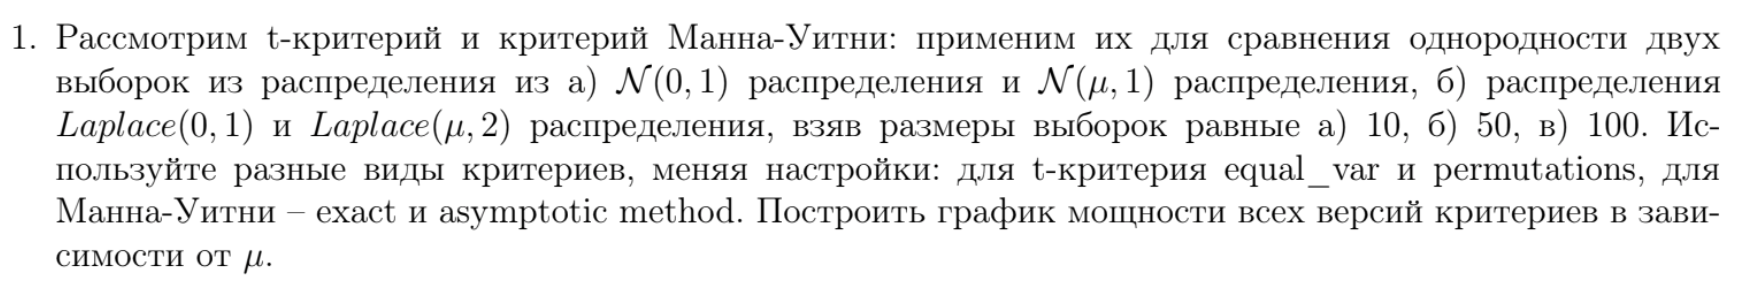

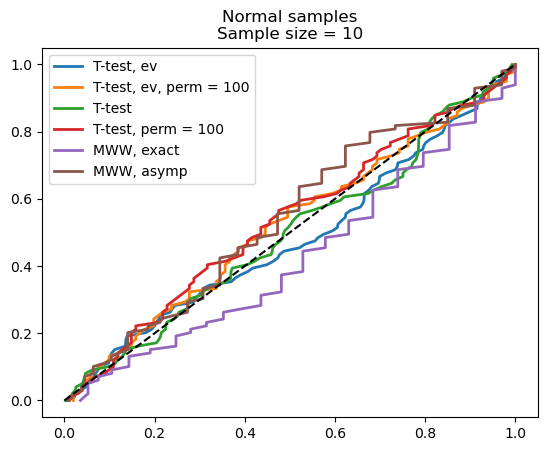

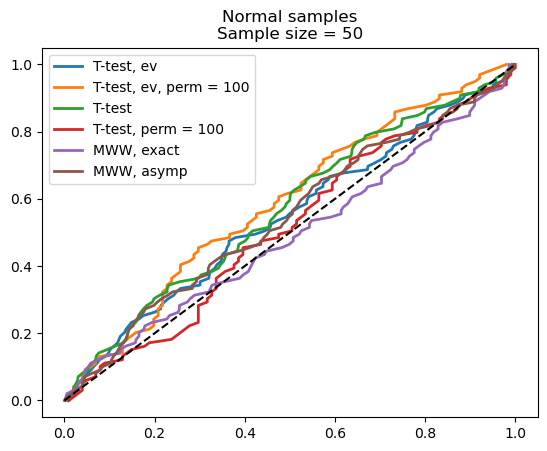

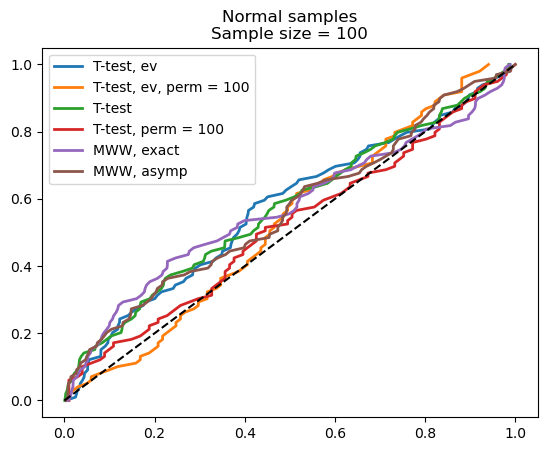

In [2]:
#assuming inpedendence of samples
ss = (10, 50, 100)

division_rate = 100
mu = 0.1

def get_pvals(distr_a, distr_b, mode, ss, params):
    test_a = distr_a.rvs(size=(division_rate, ss))
    test_b = distr_b.rvs(size=(division_rate, ss))
    if mode == 1:
        result = [sts.ttest_ind(test_a[i], test_b[i], equal_var = params[0], permutations = params[1]).pvalue for i in range(division_rate)]
    else:
        result = [sts.mannwhitneyu(test_a[i], test_b[i], method = params).pvalue for i in range(division_rate)]
    return result
#### params может быть (True/False, None/10) при моде 1 и 'exact'/'asymptotic' при моде 2
y = np.linspace(0,1, division_rate)
for ss in ss:
    fig, ax = plt.subplots()
    plt.title(f"Normal samples\nSample size = {ss}")
    ax.plot(np.sort(get_pvals(sts.norm, sts.norm(loc=mu, scale=1), 1, ss, (True, None))), y, lw = 2, label = "T-test, ev")
    ax.plot(np.sort(get_pvals(sts.norm, sts.norm(loc=mu, scale=1), 1, ss, (True, 100))), y, lw = 2, label = "T-test, ev, perm = 100")
    ax.plot(np.sort(get_pvals(sts.norm, sts.norm(loc=mu, scale=1), 1, ss, (False, None))), y, lw = 2, label = "T-test")
    ax.plot(np.sort(get_pvals(sts.norm, sts.norm(loc=mu, scale=1), 1, ss, (False, 100))), y, lw = 2, label = "T-test, perm = 100")
    ax.plot(np.sort(get_pvals(sts.norm, sts.norm(loc=mu, scale=1), 2, ss, 'exact')), y, lw = 2, label = "MWW, exact")
    ax.plot(np.sort(get_pvals(sts.norm, sts.norm(loc=mu, scale=1), 2, ss, 'asymptotic')), y, lw = 2, label = "MWW, asymp")
    ax.plot(y,y, linestyle='dashed', c='black')
    ax.legend()

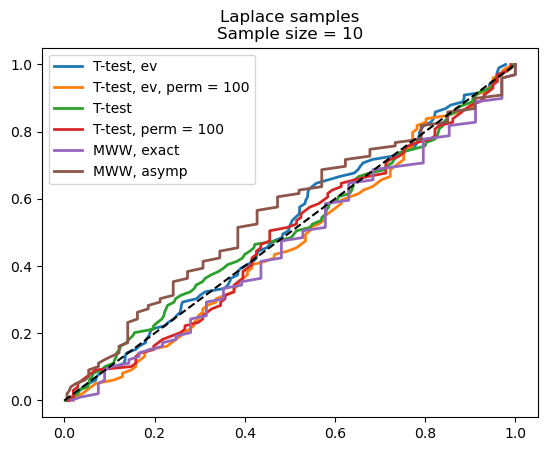

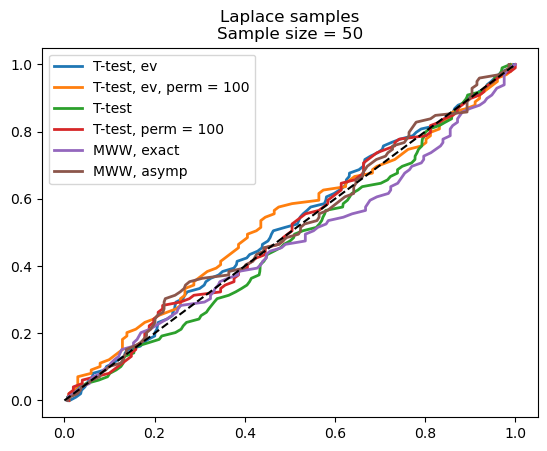

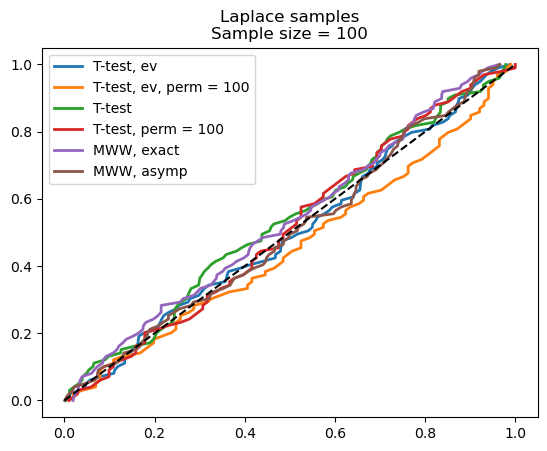

In [3]:
ss = (10, 50, 100)
for ss in ss:
    fig, ax = plt.subplots()
    plt.title(f"Laplace samples\nSample size = {ss}")
    ax.plot(np.sort(get_pvals(sts.laplace, sts.laplace(loc=mu, scale=2), 1, ss, (True, None))), y, lw = 2, label = "T-test, ev")
    ax.plot(np.sort(get_pvals(sts.laplace, sts.laplace(loc=mu, scale=2), 1, ss, (True, 100))), y, lw = 2, label = "T-test, ev, perm = 100")
    ax.plot(np.sort(get_pvals(sts.laplace, sts.laplace(loc=mu, scale=2), 1, ss, (False, None))), y, lw = 2, label = "T-test")
    ax.plot(np.sort(get_pvals(sts.laplace, sts.laplace(loc=mu, scale=2), 1, ss, (False, 100))), y, lw = 2, label = "T-test, perm = 100")
    ax.plot(np.sort(get_pvals(sts.laplace, sts.laplace(loc=mu, scale=2), 2, ss, 'exact')), y, lw = 2, label = "MWW, exact")
    ax.plot(np.sort(get_pvals(sts.laplace, sts.laplace(loc=mu, scale=2), 2, ss, 'asymptotic')), y, lw = 2, label = "MWW, asymp")
    ax.plot(y,y, linestyle='dashed', c='black')
    ax.legend()

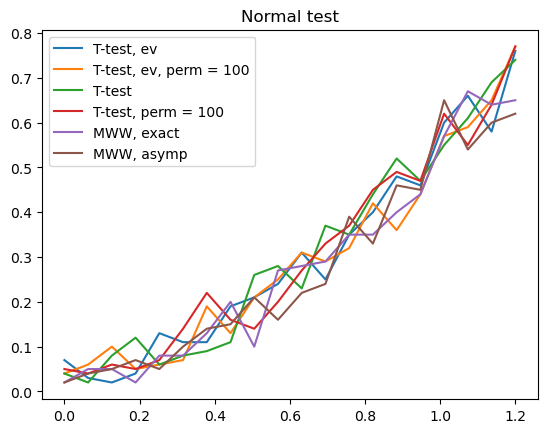

In [4]:
mu_test = np.linspace(0,1.2,20)
division_rate = 100
alpha = 0.05
ss = 10
fig, ax = plt.subplots()
plt.title("Normal test")
def get_power(distr_a, distr_b, mode, ss, params):
    pvals = get_pvals(distr_a, distr_b, mode, ss, params)
    check = np.array(pvals) < alpha
    power = sum(check)/division_rate
    return power
def draw(sample, name):
    ax.plot(mu_test, sample, label = f"{name}")
power1 = []
power2 = []
power3 = []
power4 = []
power5 = []
power6 = []
for mu in mu_test:
    power1.append(get_power(sts.norm, sts.norm(loc=mu, scale=1), 1, ss, (True, None)))
    power2.append(get_power(sts.norm, sts.norm(loc=mu, scale=1), 1, ss, (True, 100)))
    power3.append(get_power(sts.norm, sts.norm(loc=mu, scale=1), 1, ss, (False, None)))
    power4.append(get_power(sts.norm, sts.norm(loc=mu, scale=1), 1, ss, (False, 100)))
    power5.append(get_power(sts.norm, sts.norm(loc=mu, scale=1), 2, ss, 'exact'))
    power6.append(get_power(sts.norm, sts.norm(loc=mu, scale=1), 2, ss, 'asymptotic'))
draw(power1, "T-test, ev")
draw(power2, "T-test, ev, perm = 100")
draw(power3, "T-test")
draw(power4, "T-test, perm = 100")
draw(power5, "MWW, exact")
draw(power6, "MWW, asymp")
plt.legend()

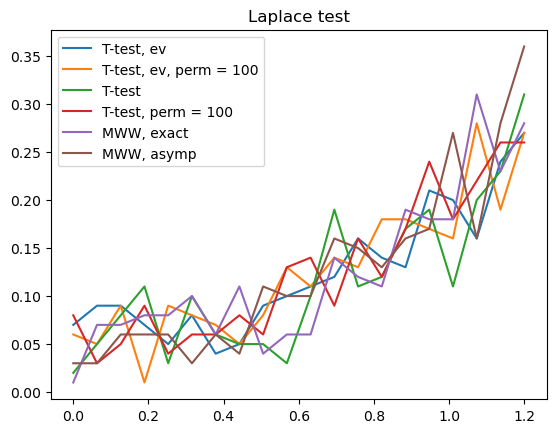

In [5]:
fig, ax = plt.subplots()
plt.title("Laplace test")
power1 = []
power2 = []
power3 = []
power4 = []
power5 = []
power6 = []
for mu in mu_test:
    power1.append(get_power(sts.laplace, sts.laplace(loc=mu, scale=2), 1, ss, (True, None)))
    power2.append(get_power(sts.laplace, sts.laplace(loc=mu, scale=2), 1, ss, (True, 100)))
    power3.append(get_power(sts.laplace, sts.laplace(loc=mu, scale=2), 1, ss, (False, None)))
    power4.append(get_power(sts.laplace, sts.laplace(loc=mu, scale=2), 1, ss, (False, 100)))
    power5.append(get_power(sts.laplace, sts.laplace(loc=mu, scale=2), 2, ss, 'exact'))
    power6.append(get_power(sts.laplace, sts.laplace(loc=mu, scale=2), 2, ss, 'asymptotic'))
draw(power1, "T-test, ev")
draw(power2, "T-test, ev, perm = 100")
draw(power3, "T-test")
draw(power4, "T-test, perm = 100")
draw(power5, "MWW, exact")
draw(power6, "MWW, asymp")
plt.legend()

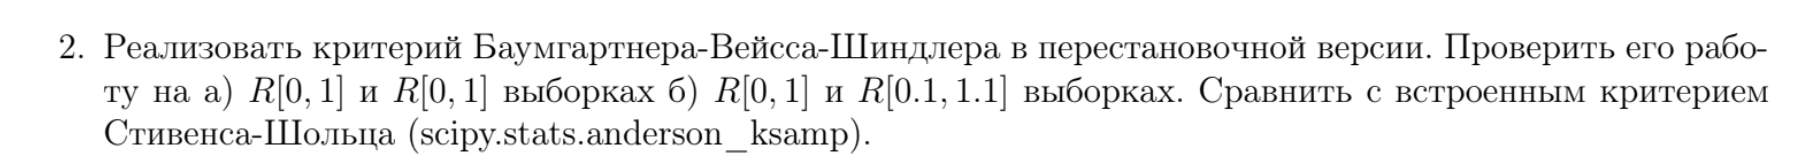

In [173]:
def get_sum(n1:int, n2:int, ranks:np.array):
    const = (n1+1)/(2*n2*(n1+n2))
    arr = []
    for i in range(n1):
        num = (ranks[i] - (n1+n2)*(i+1)/n1)**2
        den = (i+1)*(1-(i+1)/(n1+1))
        arr = np.append(arr, num/den)
    res = arr.sum()
    return const*res
def BWS_stat(sample1, sample2):
    ss1 = len(sample1)
    ss2 = len(sample2)
    res = sts.rankdata(np.concatenate((sample1, sample2)))
    res1 = np.sort(res[0:ss1])
    res2 = np.sort(res[ss1:ss2+ss1])
    sum1 = get_sum(ss1,ss2,res1)
    sum2 = get_sum(ss2,ss1,res2)
    stat = sum1 + sum2
    return stat
def monte_carlo_test(data, statistic):
    size = len(data)
    pvalue = (data>statistic).sum()/size
    return pvalue
def get_test_result(num_samp, ss1, ss2):
    rvs1 = sts.uniform.rvs(size=(num_samp,ss1))
    rvs2 = sts.uniform.rvs(size=(num_samp,ss2))
    test_results = [BWS_stat(rvs1[i], rvs2[i]) for i  in range(num_samp)]
    return test_results
def get_pvals(data1, data2, test_result): #data is 2darray
    num_given_samp = len(data1)
    data_results = [BWS_stat(data1[i], data2[i]) for i  in range(num_given_samp)]
    pvals = np.sort(list(map(lambda x: monte_carlo_test(test_results, x), data_results)))
    return pvals
def get_pvals_anderson(data1, data2):
    rng = np.random.default_rng()
    method = sts.PermutationMethod(n_resamples=200, random_state=rng)
    pvals = []
    for i in range(len(data1)):
        pvals.append(sts.anderson_ksamp((data1[i], data2[i]), method = method).pvalue)
    pvals.sort()
    return pvals

In [174]:
test_results = get_test_result(1000, 100, 300)

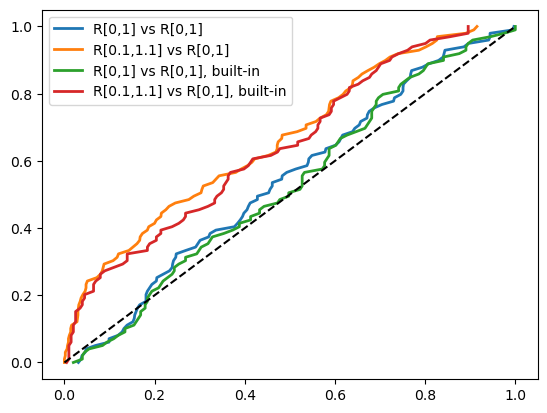

In [177]:
fig, ax = plt.subplots()

ss1 = 10
ss2 = 30
division_rate = 100

sample1 = sts.uniform.rvs(size=(division_rate,ss1))
sample2 = sts.uniform.rvs(size=(division_rate,ss2))

sample3 = sts.uniform.rvs(size=(division_rate,ss1))
sample4 = sts.uniform(loc=0.1, scale=1).rvs(size=(division_rate,ss2))

y = np.linspace(0,1, division_rate)
ax.plot(get_pvals(sample1, sample2, test_results), y, lw = 2, label = 'R[0,1] vs R[0,1]')
ax.plot(get_pvals(sample3, sample4, test_results), y, lw = 2, label = 'R[0.1,1.1] vs R[0,1]')
ax.plot(get_pvals_anderson(sample1, sample2), y, lw = 2, label = 'R[0,1] vs R[0,1], built-in')
ax.plot(get_pvals_anderson(sample3, sample4), y, lw = 2, label = 'R[0.1,1.1] vs R[0,1], built-in')

ax.plot(y,y, linestyle='dashed', c='black')
ax.legend()

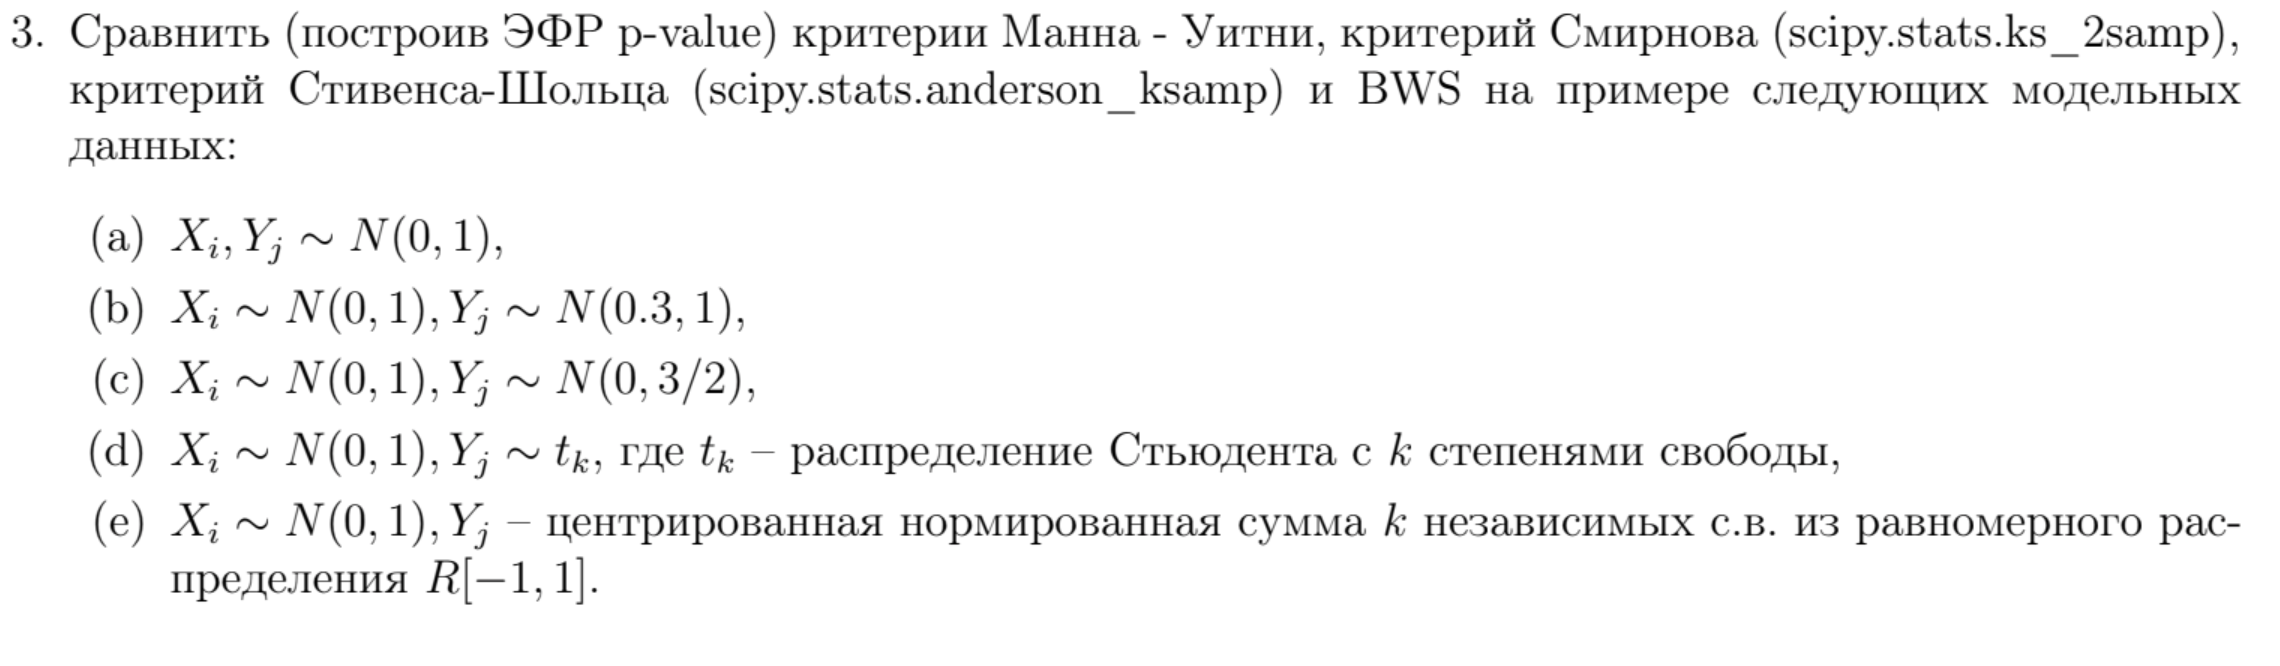

In [146]:
division_rate = 100
def get_pvals_mww(data1, data2):
    res = [sts.mannwhitneyu(data1[i], data2[i]).pvalue for i in range(division_rate)]
    res.sort()
    return res
def get_pvals_anderson(data1, data2):
    rng = np.random.default_rng()
    method = sts.PermutationMethod(n_resamples=200, random_state=rng)
    pvals = []
    for i in range(len(data1)):
        pvals.append(sts.anderson_ksamp((data1[i], data2[i]), method = method).pvalue)
    pvals.sort()
    return pvals
def get_pvals_bws(data1, data2):
    res = [sts.bws_test(data1[i], data2[i]).pvalue for i in range(division_rate)]
    res.sort()
    return res
def get_pvals_smirnov(data1, data2):
    res = [sts.ks_2samp(data1[i], data2[i]).pvalue for i in range(division_rate)]
    res.sort()
    return res
def task(sample1, sample2, name):
    fig, ax = plt.subplots()
    plt.title(f"{name}")
    y = np.linspace(0,1, division_rate)
    ax.plot(get_pvals_mww(sample1, sample2), y, lw = 2, label = 'MWW')
    ax.plot(get_pvals_anderson(sample1, sample2), y, lw = 2, label = 'Anderson')
    ax.plot(get_pvals_bws(sample1, sample2), y, lw = 2, label = 'BWS')
    ax.plot(get_pvals_smirnov(sample1, sample2), y, lw = 2, label = 'Smirnov')
    ax.plot(y,y, linestyle='dashed', c='black')
    ax.legend()

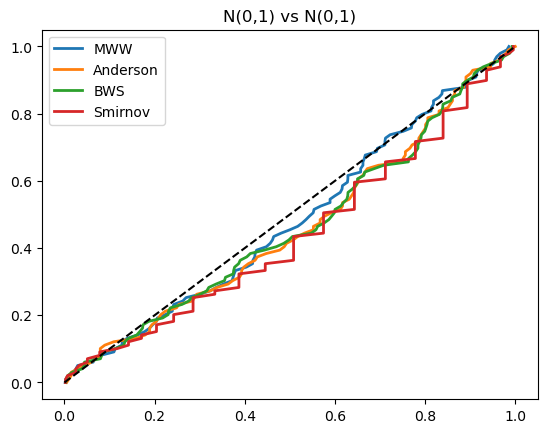

In [46]:
ss1 = 100
ss2 = 200
sample1 = sts.norm.rvs(size=(division_rate,ss1))
sample2 = sts.norm.rvs(size=(division_rate,ss2))

task(sample1, sample2, 'N(0,1) vs N(0,1)')

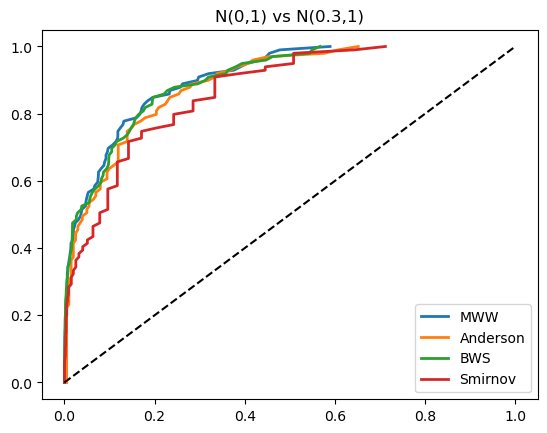

In [47]:
ss1 = 100
ss2 = 200
sample1 = sts.norm.rvs(size=(division_rate,ss1))
sample2 = sts.norm(loc=0.3).rvs(size=(division_rate,ss2))

task(sample1, sample2, 'N(0,1) vs N(0.3,1)')

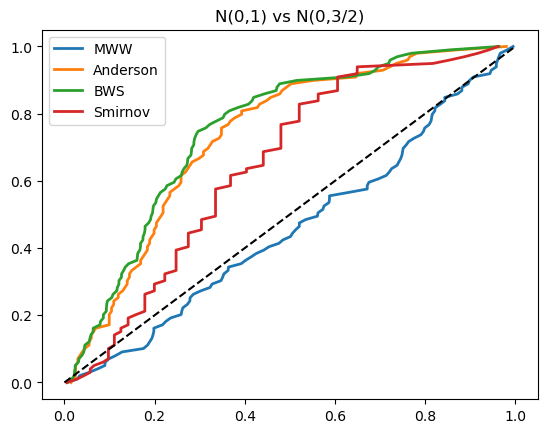

In [184]:
ss1 = 100
ss2 = 150
sample1 = sts.norm.rvs(size=(division_rate,ss1))
sample2 = sts.norm(scale=np.sqrt(3/2)).rvs(size=(division_rate,ss2))

task(sample1, sample2, 'N(0,1) vs N(0,3/2)')

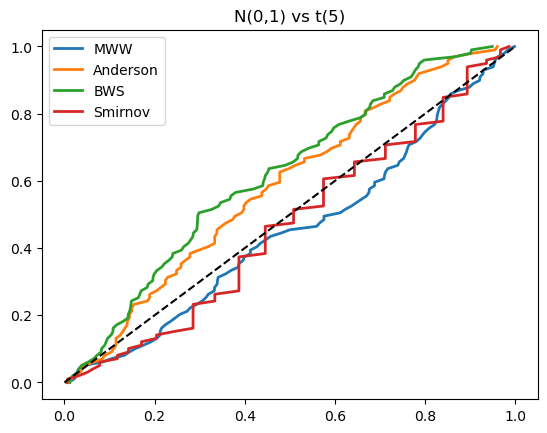

In [183]:
ss1 = 100
ss2 = 200
sample1 = sts.norm.rvs(size=(division_rate,ss1))
sample2 = sts.t(5).rvs(size=(division_rate,ss2))

task(sample1, sample2, 'N(0,1) vs t(5)')

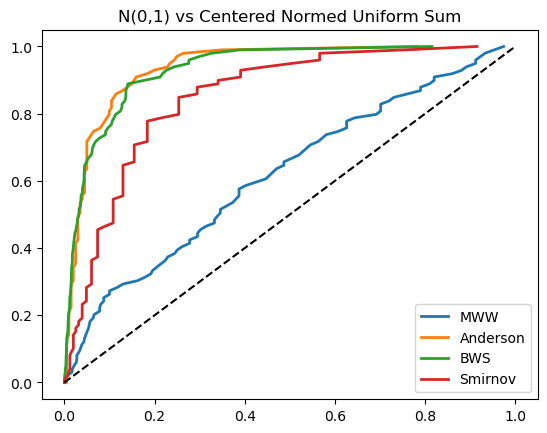

In [180]:
ss1 = 50
ss2 = 20
sample1 = sts.norm.rvs(size=(division_rate,ss1))
k = 5
sample2 = []
for j in range(division_rate):
    subsample = []
    for i in range (ss2):
        rvs = sts.uniform(loc = -1, scale = 2).rvs(size=k)
        rvs = (rvs.sum() - rvs.mean())/(rvs.std())
        subsample = np.append(subsample, rvs)
    sample2.append(subsample)
task(sample1, sample2, 'N(0,1) vs Centered Normed Uniform Sum')

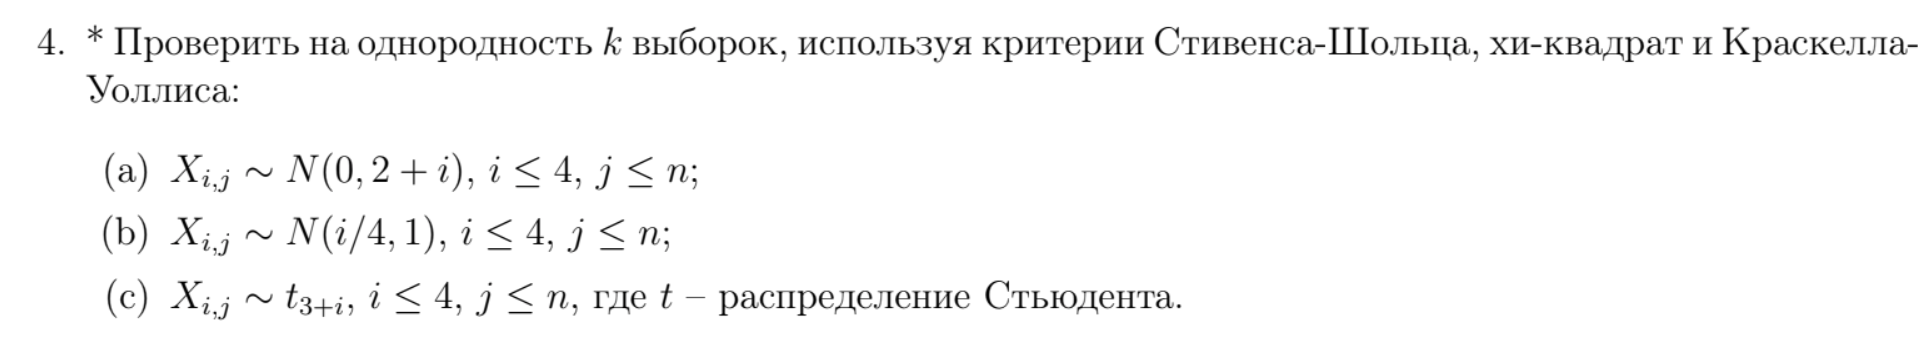

In [508]:
division_rate = 100
def get_data(mode, num_samp, sample_size):
    res_samp = []
    for i in range(num_samp):
        if mode == 1:
            samp = sts.norm(loc=0, scale=np.sqrt(2+i)).rvs(size=sample_size)
        elif mode == 2:
            samp = sts.norm(loc=i/4, scale=1).rvs(size=sample_size)
        elif mode == 3:
            samp = sts.t(3+i).rvs(size=sample_size)
        res_samp.append(samp)
    return res_samp
def get_fobs(data):
    res = []
    ss = len(data[0])
    unified_sample = np.concatenate(data)
    df = math.floor(math.log2(ss*len(data)))
    z = np.array_split(np.sort(unified_sample), df)
    bins = [z[i][0] for i in range(df)]
    bins.append(z[df-1][-1])
    for j in range(len(data)):
        fobs, bin_edg = np.histogram(data[j], bins)
        res.append(fobs)
    return res
def get_res(mode_test, mode_data, num_samp, sample_size):
    result = []
    for j in range(division_rate):
        data = get_data(mode_data, num_samp, sample_size)
        if mode_test == 1:
            result.append(sts.kruskal(*data).pvalue)
        elif mode_test == 2:
            fobs = get_fobs(data)
            result.append(sts.chi2_contingency(fobs).pvalue)
        elif mode_test == 3:
            rng = np.random.default_rng()
            method = sts.PermutationMethod(n_resamples=200, random_state=rng)
            result.append(sts.anderson_ksamp(data, method=method).pvalue)
    result.sort()
    return result
def task4(example_num, name):
    fig, ax = plt.subplots()
    plt.title(f"Example#{example_num}, {name}")
    y = np.linspace(0,1, division_rate)

    num_samp = 4
    ss = 120

    ax.plot(get_res(1, example_num,num_samp, ss), y, lw = 2, label = 'Kruskal')
    ax.plot(get_res(2, example_num,num_samp, ss), y, lw = 2, label = 'CHI2')
    ax.plot(get_res(3, example_num,num_samp, ss), y, lw = 2, label = 'Anderson')

    ax.plot(y,y, linestyle='dashed', c='black')
    ax.legend()

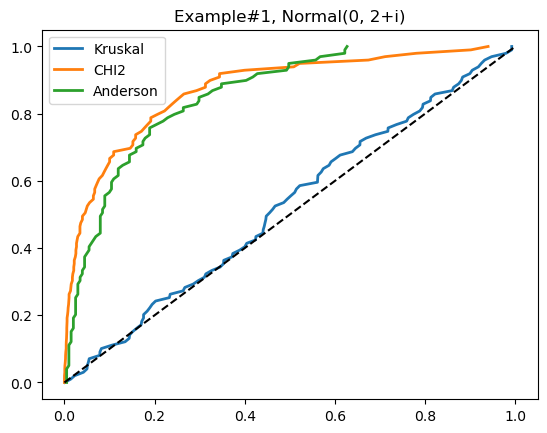

In [503]:
task4(1,"Normal(0, 2+i)")

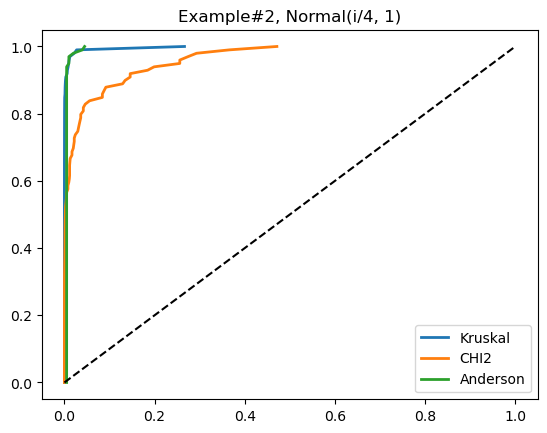

In [504]:
task4(2,"Normal(i/4, 1)")

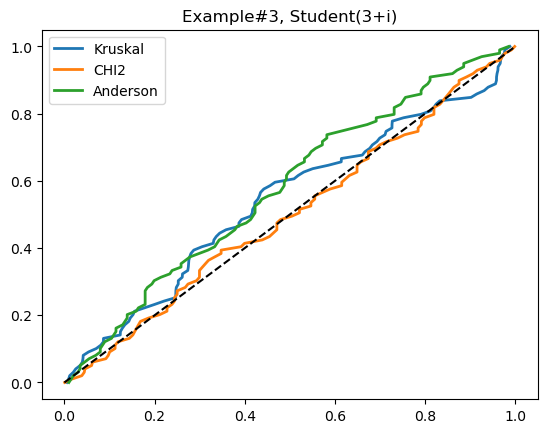

In [509]:
task4(3,"Student(3+i)")